<b>Full documentation of pyplot can be found <a href="https://matplotlib.org/api/pyplot_api.html">here</a>. Some less useful information will be omitted in this guide, so check the documentation for more in-depth information.</b>


<h2>Imports</h2>

The first thing that you need to do when making your heatmap is to import the necessary libraries. You will need to import both matplotlib.pyplot as well as numpy. It is common practice to import numpy as np and matplotlib.pyplot as plt, but you may change np and plt to whatever you desire. Whatever you choose to import them as will be the prefix you will need to use when calling functions from numpy or matplotlib.pyplot.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

<h2>Data</h2>

Next, you will need to create two arrays that will serve as the data points for the x and y axis. Depending on your needs, this can either be random, for which numpy has numerous functions to return a random array of different number distributions (i.e. gamma, hypergeometric, standard normal, chisquared, etc), or arrays you will need to fill with your own data. If you need random numbers, a list of the different distributions you can make random samples from and the documentation can be found <a href="https://docs.scipy.org/doc/numpy-1.12.0/reference/routines.random.html">here.</a> If you have your own data, you may use numpy's genfromtxt function, whose documentation can be found <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html">here.</a> When calling a random function, you must use np.random.function(parameters…) to do so instead of simply np.function(parameters…).

In [2]:
#x and y are arrays of length 2048 with elements coming from a standard norm. dist.
x = np.random.randn(2048)
y = np.random.randn(2048)

<h2>2D Histogram</h2>

Next you will want to create a 2D histogram using np.histogram2d(x, y, bins=(xlen, ylen). x is the x data array, y is the y data array and bins determines how the histogram is partitioned (in a way, it’s the level of detail). When calling histogram2d, you must have two other variables that are set equal to it, as histogram2d returns three things: the histogram, the x axis bin edges, and the y axis bin edges. The bin edges are an array of elements that mark a percentile for the related data set. For example, for an x bins of 100, the xedges array would have 101 elements, where the first element is the smallest element of x, the next element is the first plus 1% of the difference between the largest and smallest element of x, the next is the first plus 2% of the difference between the largest and smallest element of x, and so on until the 101st element which would be the largest element of x. An example of a call to the histogram2d function would be 


In [3]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(32,32))

The bins setting here causes the 2dhistogram to be a 32 by 32 grid. More intense colors in our colormap would be in the parts of the grid where there are more data points. For example, for a standard normal distribution, we would expect more datapoints to be near the center of the grid, so the center has more intense coloring for its color map there. If we up the bins to say, (512,512), then each individual spot on the grid is going to be less intense because it is overall less likely that a datapoint will fall into the same particular grid square (as what would have been the same spot before on a lower bins count is now two separate grid squares). Additionally, you will want to keep the two bin numbers the same, or else the grid partitions will not be square. You may make them different if you want a grid to be long on one axis however. 

Full documentation regarding the histogram2d can be found <a href="https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.histogram2d.html">here.</a>

<h2>Extent</h2>

Next, we will need to create the extent, which will give the graph a reference for the bottom left and top right corners that it will use when creating the image of the graph. If we choose not to make an extent, then the default axis ticks will be based off the grid coordinates rather than the value of the data in the x and y arrays. Simply set the extent to be a list of four elements: the first element of x, the last element of x, the first element of y, and the last element of y. If you different values than what is suggested here, then the graph will plot points on a scale based off the extent given that causes the true value of the datapoints and the value of the datapoints based off the plot's display to not be the same. (For example, if the extent should really be -3 to 3 on both axes but I set it to be -9 to 9 on both, the plot might look the same as if I had done it as -3 to 3, but a datapoint at say -2 2 is visually at -6 6 according to the plot's ticks.)

In [4]:
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
print("minimum x value is " + str(extent[0]))
print("maximum x value is " + str(extent[1]))
print("minimum y value is " + str(extent[2]))
print("maximum y value is " + str(extent[3]))

minimum x value is -3.43211866861
maximum x value is 3.30427048598
minimum y value is -3.43794830622
maximum y value is 3.11255161401


Next, you may add miscellaneous things to your graph, such as a title, axes labels, annotations, and so on. A full list of all the things you can do are documented <a href="https://matplotlib.org/api/pyplot_api.html">here.</a>

Some of the more commmonly needed commands are...

<h2>Title</h2>

plt.title(name) puts a title equal to the name parameters at the top of the graph.

In [5]:
plt.title("Test Heatmap")

<h2>XLabel/YLabel</h2>

plt.x(y)label(label) puts a label on the x(y)-axis equal to the label parameter.

In [6]:
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

<h2>XTicks/YTicks</h2>

plt.x(y)ticks([ticks],[labels]) will set ticks at the values given in the array ticks with the labels at the equivalent index in the array labels. Special characters (for example, the pi symbol) may be used. To use a special character, it must be formatted as `r’$\symbol$’` . For example, to write -π/2 as the label for the first tick, you would put `r’$-\pi/2$’` as the first element in the labels array (you may use this replacement technique anywhere). This is done by mathtext which is a part of matplotlib. You may find the documentation on mathtext <a href="https://matplotlib.org/users/mathtext.html">here.</a> By default for heatmaps, the x and y ticks will be set to the x and y bin values, such that the ticks represent the position of the grid square rather than what data values it represents, but by using the extent later on this will be changed to the data values.

In [7]:
plt.xticks(np.arange(-5,6))
plt.yticks(np.arange(-5,6))
#np.arrange(-5,6) will create an array with elements -5, -4, -3, ... 4, 5

([<matplotlib.axis.YTick at 0x2586b551ac8>,
 <a list of 11 Text yticklabel objects>)

<h2>XLim/YLim</h2>

plt.x(y)lim(min, max) will set the minimum and maximum limits for that axis on the graph to the values min and max. Heatmaps by default set the limit to encompass the most extreme values and nothing more. For example, the limits for a standard normal distribution sample are set the way they are because there is a square of the grid with a data point (a “hotter” pixel) on each of the four edges of the graph. We won't set any limits as the extent will do that for us, but if you set limits that go beyond the extreme points on the graph (the extent), anything outside the bounds set by the extent is whitespace.

In [8]:
#use of the x(y)lim command looks like so
#plt.xlim(-5,5)
#plt.ylim(-5,5)

<h2>Annotations</h2>

plt.annotate(label, xy=(x, y), xytext=(x,y), arrowprops=dict(properties...), bbox=dict(boxparameter=...), textkwargs=argument, ...) will put an annotation with a label given by the label parameter. The label will be placed at the coordinates given by xytext with an arrow pointing to the coordinates given by xy. arrowprops is a dictionary of properties that will be given to the arrow the annotation uses. If arrowprops is None, (which is the default), then no arrow will appear. textkwargs represents any text kwarg (keyword argument) that will be passed to the text of the annotation (for instance, color="white" will turn the text white). Lastly, bbox is a dict of properties of a box that surrounds the text of the annotation. It is set to None by default, in which case no box will appear around the text. A full list of text kwargs can be found <a href="https://matplotlib.org/api/text_api.html">here.</a> Documentation on bbox may be found <a href="https://matplotlib.org/users/annotations.html#advanced-annotation">here.</a> A full list of arrowprops's parameters may be found in the link at the bottom of this section. When using this function, you must give the parameters by writing out parameter=(information). or else the function will not understand what parameter you’re trying to pass info to. Information on other parameters for this function can be found <a href="https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate">here.</a>

In [9]:
plt.annotate("This is an annotation label", xy=(0,0), xytext=(-2,2), arrowprops=dict(width=2), color="white", fontsize=12, bbox=dict(boxstyle="round,pad=0.2",alpha=.4))

<h2>Creating the image</h2>

Now, to create the graph image itself that is your plot, you will need to call plt.imshow(histogram, cmap=”colormap”, extent=extent). The histogram should be the 2D histogram you created earlier, while cmap should be a string corresponding to a colormap. Some examples of color maps include hot, gray, prism (a repeated, condensed rainbow), cool, copper, hsv (rainbow scale), and more. You can also add “_r” to the name of a color map to reverse the order. Lastly, set the extent to the extent created earlier (or a custom one if you prefer something different).

More parameters for imshow can be found <a href="https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow">here.</a>

In [10]:
plt.imshow(heatmap, cmap="hsv", extent=extent)

Finally, call plt.show() to display your graph!

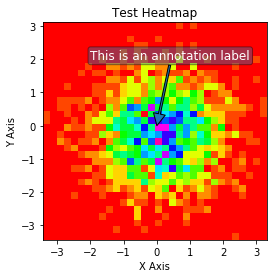

In [11]:
plt.show()